# Nummeriske løsninger Fysikk prosjekt

### Av: Sahil, Jesper og Sam

## Oppgave 1

---

##### Importerer pylab, stort library med det meste av math, numpy og matplotlib

In [199]:
from pylab import *

#### Globale variabler

In [239]:
g = 9.81
r_halvkule = 0.51   # meter

r_kule = 0.0215     # meter
m_kule = 0.167      # kilogram

r_sylinder_hul = 0.022
m_sylinder_hul = 0.215

r_sylinder_fast = 0.0215
m_sylinder_fast = 1.795

tN = 100000         # N tidssteg

#### Funksjon for eulers metode opg 1

In [240]:
def euler_opg1(theta0,m,r,tol=0.01): # euler med sum av krefter betraktning
    r += r_halvkule  # slik at lille r er (r+R)
    
    # tid
    global t                    # til evt plotting 
    t_total = 7                # sekunder
    t = linspace(0,t_total,tN)  # tidsdiskretisering (array)
    dt = t[1]-t[0]              # tidssteg
    
    # arrayer for relevante verdier
    theta = zeros(len(t))       # vinkel, theta per tid
    omega = zeros(len(t))       # vinkelfart, omega per tid
    alpha = zeros(len(t))       # vinkel aksellerasjon, (g*sin(theta0))/(R+r)
    
    # initialisering
    theta[0] = theta0
    omega[0] = 0
    alpha[0] = (g*sin(theta0))/(r)  
    
    # kritisk vinkel
    thetakrit = 0
    
    # mutasjoner av eulersmetode 
    for i in range(len(t)-1):
        omega[i+1] = omega[i] + alpha[i] * dt
        theta[i+1] = theta[i] + omega[i] * dt
        alpha[i+1] = (g*sin(theta[i]))/(r)
        #print(theta[i])
        
        v = sqrt((cos(theta0)-cos(theta[i]))*2*g*(r))           # (r+R)*omega[i], ## fart gitt ved theta/ omega
        sumf = (-(v**2)/(r) + g*cos(theta[i]))    # summen av krefter
        
        if -tol < sumf < tol:      # sjekker om summ av krefter er nære null
            thetakrit = theta[i]
            break

        
    return thetakrit*180/pi

#### kjøring av kode

In [241]:
kule = euler_opg1(0.35325464060365225,m_kule,r_kule)
print('kule:', kule)
sylinder_hul = euler_opg1(0.35325464060365225,m_sylinder_hul,r_sylinder_hul)
print('sylinder:',sylinder_hul)
sylinder_fast = euler_opg1(0.001,m_sylinder_fast,r_sylinder_fast)
print(sylinder_fast)


kule: 51.26562468593612
sylinder: 51.258596712239196
48.17269485434124


## Oppgave 2

---

#### Globale variabler

In [242]:
# c er fra I0 til objektene, f.eks I0_kule = 2/5mr**r, c = 2/5
c_kule = 2/5
c_sylinder_hul = 1
c_sylinder_fast = 1/2

#### Funksjon for eulers metode for opg 2

In [248]:
def euler_opg2(theta0,m,r,c,tol=0.01): # euler med sum av krefter betraktning
    r += r_halvkule     # slik at lille r er (r+R)
    
    # tid
    global t                    # til evt plotting 
    t_total = 7                 # sekunder
    t = linspace(0,t_total,tN)  # tidsdiskretisering (array)
    dt = t[1]-t[0]              # tidssteg
    
    # arrayer for relevante verdier
    theta = zeros(len(t))       # vinkel, theta per tid
    omega = zeros(len(t))       # vinkelfart, omega per tid
    alpha = zeros(len(t))           # vinkel aksellerasjon, (g*sin(theta0))/(R+r)
    
    # initialisering
    theta[0] = theta0
    omega[0] = 0
    alpha[0] = (g*sin(theta0))/(r*(c+1)) 
    
    # kritisk vinkel
    thetakrit = 0

    # mutasjoner av eulersmetode 
    for i in range(len(t)-1):
        omega[i+1] = omega[i] + alpha[i] * dt
        theta[i+1] = theta[i] + omega[i] * dt
        alpha[i+1] = (g*sin(theta[i]))/(r*(c+1)) #(g*np.sin(theta[i])/(r))*(1+(c/(c+1))) #(g*sin(theta[i]))/(r)
        
        v = sqrt(((cos(theta[0])-cos(theta[i]))*2*g*r)/(c+1))           # (r+R)*omega[i], ## fart gitt ved theta/ omega
        sumf = (-(v**2)/(r) + g*cos(theta[i]))      # summen av krefter
        
        if -tol < sumf < tol:      # sjekker om summ av krefter er nære null
            thetakrit = theta[i]
            break
        
    return thetakrit*180/pi,theta

In [244]:
kule = euler_opg2(20.8*pi/180,m_kule,r_kule,c_kule)
print('kule:', kule[0])
sylinder_hul = euler_opg2(20.8*pi/180,m_sylinder_hul,r_sylinder_hul,c_sylinder_hul)
print('sylinder:',sylinder_hul[0])

kule: 56.61853639025659
sylinder: 62.10986664351402


In [259]:
def sammen_ligne(m,r,c,tol=0.01):
    theta0 = linspace(0.0001,40*pi/180,100)
    theta0x = linspace(0.0001,40,100)
    theta_s1 = []
    theta_s2 = []
    
    
    for i in theta0:
        thetakrit1 = euler_opg1(i,m,r)
        thetakrit2 = euler_opg2(i,m,r,c)
        theta_s1.append(thetakrit1)
        theta_s2.append(thetakrit2[0])
        
    #theta_s1 = array(theta_s1)
    #theta_s2 = array(theta_s2)
    
    plot(theta0x,theta_s1,label='oppgave 1')
    plot(theta0x,theta_s2,label='oppgave 2')
    xlabel('theta 0')
    ylabel('theta slipp')
    legend()
    show()
        

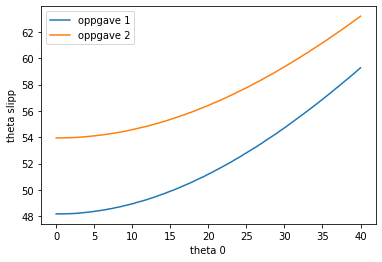

In [260]:
sammenligne = sammen_ligne(m_kule,r_kule,c_kule)


## Oppgave 3

---

#### Globale varialbler

In [206]:
my_s = 0.6     # intervall funnet på internett (0.5,0.6)
my_k = 0.5     # intervall funnet på internett (0.4,0.6)

In [292]:
def euler_opg1_mf(theta0,m,r,c,tol=0.01): # euler med sum av krefter betraktning
    r += r_halvkule  # slik at lille r er (r+R)
    
    # tid
    global t                    # til evt plotting 
    t_total = 7                # sekunder
    t = linspace(0,t_total,tN)  # tidsdiskretisering (array)
    dt = t[1]-t[0]              # tidssteg
    
    # arrayer for relevante verdier
    theta = zeros(len(t))       # vinkel, theta per tid
    omega = zeros(len(t))       # vinkelfart, omega per tid
    alpha = zeros(len(t))       # vinkel aksellerasjon, (g*sin(theta0))/(R+r)
    
    # initialisering
    theta[0] = theta0
    omega[0] = 0
    alpha[0] = (g*sin(theta0))/(r*(c+1))  
    
    # kritisk vinkel
    thetakrit = 0
    
    # mutasjoner av eulersmetode 
    for i in range(len(t)-1):
        omega[i+1] = omega[i] + alpha[i] * dt
        theta[i+1] = theta[i] + omega[i] * dt
        alpha[i+1] = (g/(r))*(np.sin(theta[i])-my_k*np.cos(theta[i]))+my_k*omega[i]**2
        #alpha[i+1] = (g*sin(theta[i])-my_k*(g*cos(theta[i])-omega[i]**2*r))/r
        #alpha[i+1] = (g*sin(theta[i]))/(r)
        #print(theta[i])
        
        v = sqrt((cos(theta0)-cos(theta[i]))*2*g*(r))           # (r+R)*omega[i], ## fart gitt ved theta/ omega
        sumf = (-(v**2)/(r) + g*cos(theta[i]))    # summen av krefter
        
        if -tol < sumf < tol:      # sjekker om summ av krefter er nære null
            thetakrit = theta[i]
            break
        #if omega[i]**2*r >= g*cos(theta[i]):
            #thetakrit2 = theta[i]
            #break

        
    return thetakrit*180/pi

#### Funksjon for eulers metode for opg 3

In [293]:
def euler_3(theta0,m,r,c,tol=0.001):
    r += r_halvkule 
    
    ren_rulling = euler_opg2(theta0,m,r,c)
    theta_l = ren_rulling[1]
    #print(theta_l)
    
    theta_s = 0
    
    printOnce = True
    
    for j in range(len(theta_l)):
        if my_s <= (c*sin(theta_l[j]))/(-2*cos(theta_l[0]+(c+3)*cos(theta_l[j]))): #(c*sin(theta_l[j]))/((c+3)*cos(theta_l[j])-2):
            theta_s = theta_l[j]
            #print(theta_s*180/pi)
            if printOnce==True:
                print(theta_s*180/pi);
                printOnce=False
            break
            
    ren_sluring = euler_opg1_mf(theta_s,m,r,c)
    
    return ren_sluring

In [298]:
print(euler_3(42.4*pi/180,m_sylinder_hul,r_sylinder_hul,c_sylinder_hul))

65.05200037019974
73.64832338667942
